### Carga de Datos

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

In [6]:
# cargar los datos desde scikit-learn
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.keys())
print(boston)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 

In [7]:
boston_ds = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston_ds['MEDV'] = boston.target
boston_ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
#Eliminando vacios y nulos
boston_ds.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploración de Datos

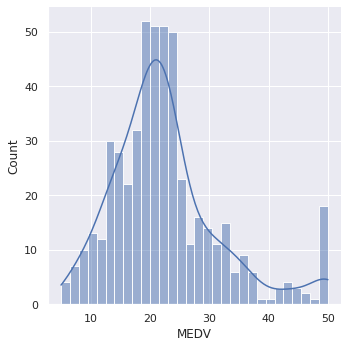

In [13]:
sns.set(rc = {'figure.figsize': (20,10)})
sns.displot(boston_ds['MEDV'], bins = 30, kde = True)
plt.show()

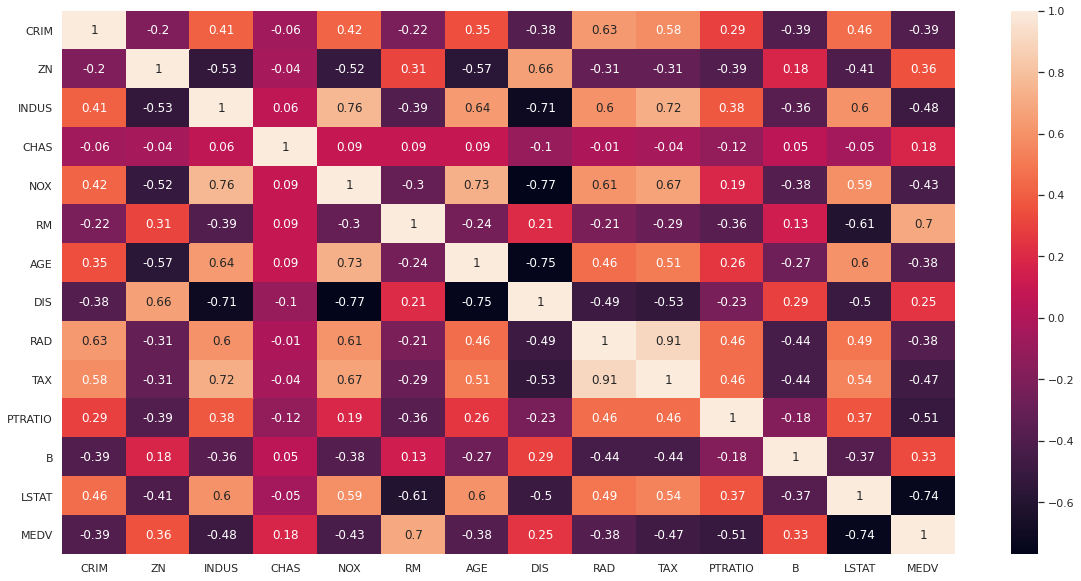

In [16]:
#Matriz de Correlación
matriz_corr = boston_ds.corr().round(2)
sns.heatmap(data = matriz_corr, annot = True);

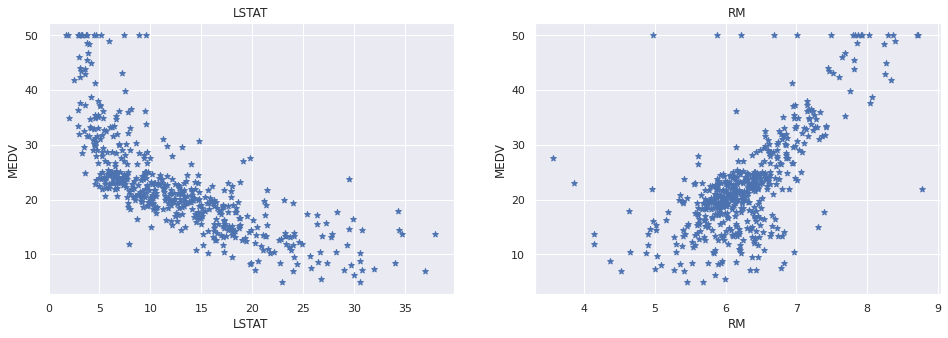

In [20]:
#Graficar LSTAT y RM
plt.figure(figsize=(16,5))

bases = ['LSTAT','RM']
objetivo = boston_ds['MEDV']

for i, col in enumerate(bases):
  plt.subplot(1, len(bases), i+1)
  x = boston_ds[col]
  y = objetivo
  plt.scatter(x,y,marker='*')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('MEDV')

### Preprocesamiento de datos

In [21]:
# dividir los conjuntos en X e y (entradas y salida respectivamente)
X = pd.DataFrame(np.c_[boston_ds['LSTAT']], columns = ['LSTAT'])
y = boston_ds['MEDV']

In [22]:
# Separar los conjuntos de entrenamiento y de testeo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

print("Entrenamiento: X = {}, y = {}".format(X_train.shape, y_train.shape))
print("Testeo: X = {}, y = {}".format(X_test.shape, y_test.shape))

Entrenamiento: X = (404, 1), y = (404,)
Testeo: X = (102, 1), y = (102,)


### Crear Modelo

In [23]:
# Creación del modelo de regresión lineal y ejecutar el entrenamiento

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelo = LinearRegression() #hipotesis
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#evaluar el modelo

y_train_predicted = modelo.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2 = r2_score(y_train, y_train_predicted)

print("Rendimiento del conjunto de entrenamiento")
print("RMSE : {}".format(rmse))
print("R2   : {}".format(r2))

Rendimiento del conjunto de entrenamiento
RMSE : 6.201452973865344
R2   : 0.5523019908037391


In [25]:
#evaluar el modelo test

y_test_predicted = modelo.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted))
r2 = r2_score(y_test, y_test_predicted)

print("Rendimiento del conjunto de entrenamiento")
print("RMSE : {}".format(rmse))
print("R2   : {}".format(r2))

Rendimiento del conjunto de entrenamiento
RMSE : 6.2307165730986815
R2   : 0.5041523728903132


### Graficar Resultados

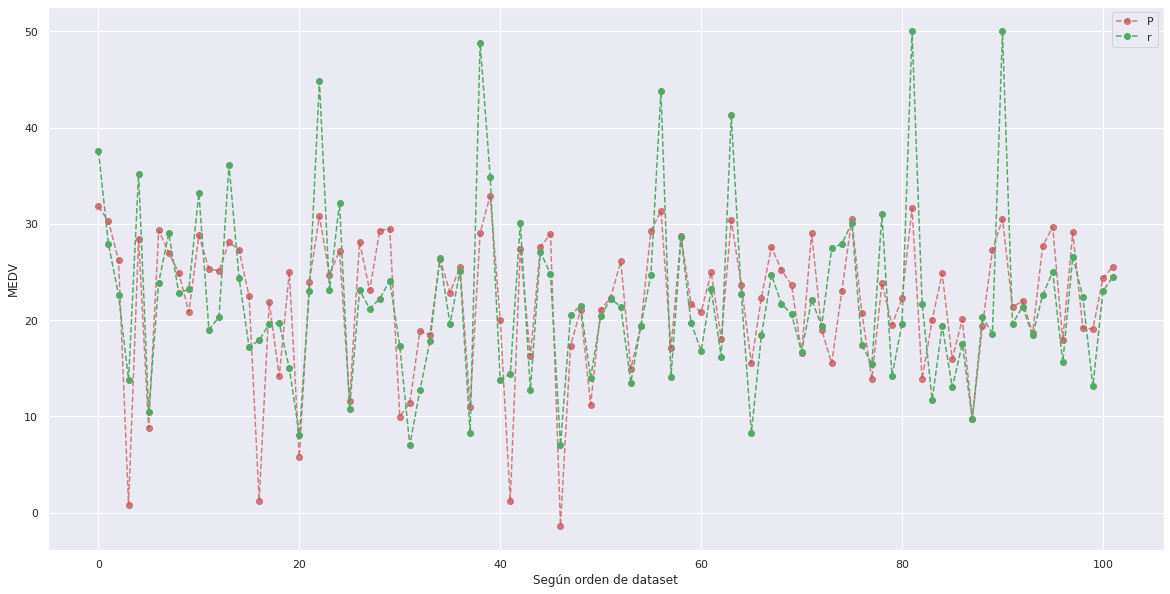

In [27]:
#Graficar los datos de predicciones

eje_x = np.array(range(0,y_test_predicted.shape[0]))

plt.plot(eje_x, y_test_predicted, linestyle = "--", marker = "o", alpha = 0.7, color = "r", label = "Predicciones")
plt.plot(eje_x, y_test, linestyle = "--", marker = "o", color = "g", label = "y_test")
plt.xlabel("Según orden de dataset")
plt.ylabel('MEDV')
plt.legend('Predicciones vs MEDV reales')
plt.show()

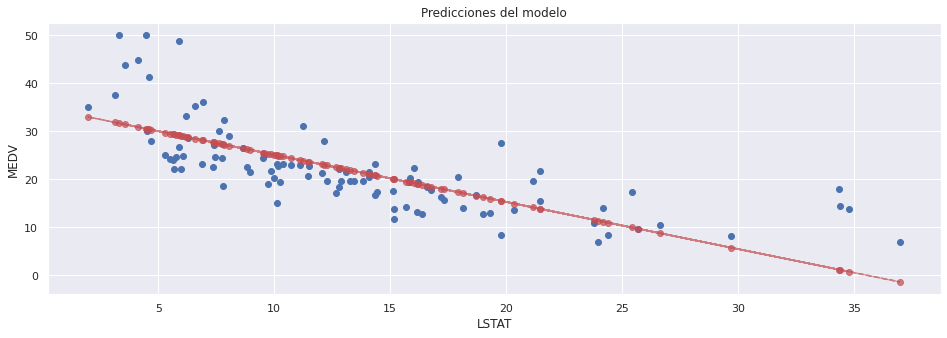

In [29]:
#Gráfico ordenado por el modelo

plt.figure(figsize = (16,5))

plt.plot(X_test, y_test_predicted, linestyle = "--", marker = "o", alpha = 0.7, color = "r", label="Predicciones")
plt.scatter(X_test,y_test, marker="o")
plt.title("Predicciones del modelo")
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

### Comparación con otros modelos (hipotesis)

In [35]:
def probar_modelo(tipo_hipotesis, X_train, y_train, X_test, y_test):
  modelo = tipo_hipotesis#hipotesis
  modelo.fit(X_train, y_train)

  y_train_predicted = modelo.predict(X_train)
  rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2 = r2_score(y_train, y_train_predicted)

  print("Rendimiento del conjunto de entrenamiento")
  print("RMSE : {}".format(rmse))
  print("R2   : {}".format(r2))

  y_test_predicted = modelo.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted))
  r2 = r2_score(y_test, y_test_predicted)

  print("Rendimiento del conjunto de entrenamiento")
  print("RMSE : {}".format(rmse))
  print("R2   : {}".format(r2))

  eje_x = np.array(range(0,y_test_predicted.shape[0]))

  plt.plot(eje_x, y_test_predicted, linestyle = "--", marker = "o", alpha = 0.7, color = "r", label = "Predicciones")
  plt.plot(eje_x, y_test, linestyle = "--", marker = "o", color = "g", label = "y_test")
  plt.xlabel("Según orden de dataset")
  plt.ylabel('MEDV')
  plt.legend('Predicciones vs MEDV reales')
  plt.show()

  #Preprocesar el ordenamiento del conjunto
  modelo_desordenado = pd.DataFrame(np.c_[X_test, y_test_predicted], columns = ['LSTAT', 'MEDV_'])
  modelo_ordenado = modelo_desordenado.sort_values(by = 'LSTAT', ascending = True)
  plt.figure(figsize = (16,5))

  plt.plot(modelo_ordenado['LSTAT'], modelo_ordenado['MEDV_'], linestyle = "--", marker = "o", alpha = 0.7, color = "r", label="Predicciones")
  plt.scatter(X_test,y_test, marker="o")
  plt.title("Predicciones del modelo")
  plt.xlabel('LSTAT')
  plt.ylabel('MEDV')
  plt.show()

Probando Modelo Lasso
Rendimiento del conjunto de entrenamiento
RMSE : 6.2030842454897215
R2   : 0.5520664288747816
Rendimiento del conjunto de entrenamiento
RMSE : 6.207978681467828
R2   : 0.5077647848123193


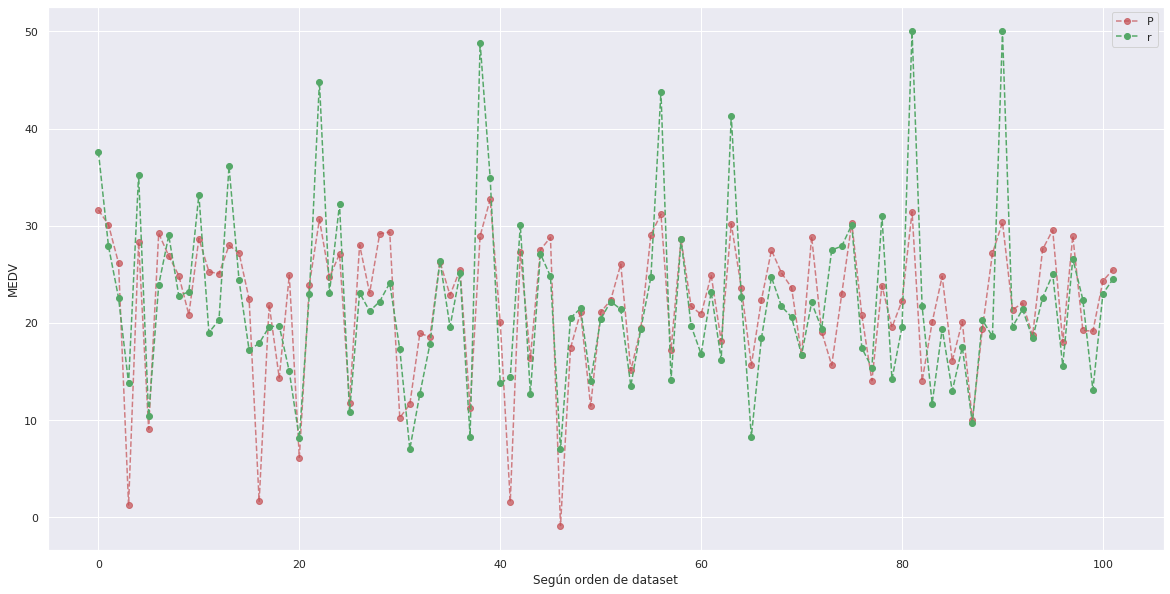

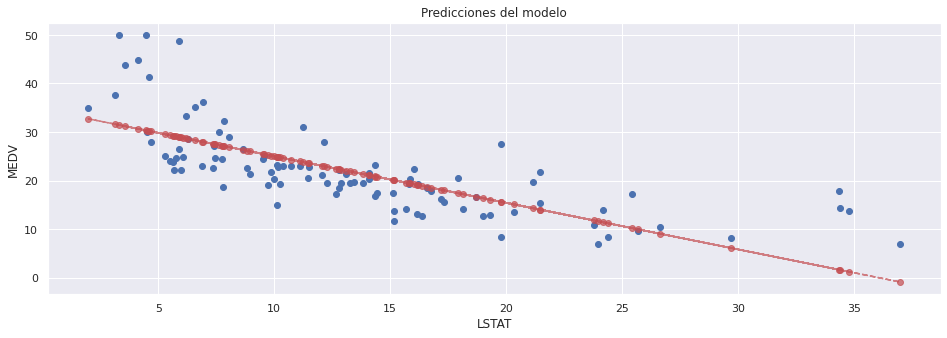

In [32]:
from sklearn.linear_model import Lasso

print("Probando Modelo Lasso")
probar_modelo(Lasso(),X_train,y_train, X_test, y_test)

Probando Modelo ARDR
Rendimiento del conjunto de entrenamiento
RMSE : 6.201468449957437
R2   : 0.5522997562873138
Rendimiento del conjunto de entrenamiento
RMSE : 6.2283412652983365
R2   : 0.5045303603082074


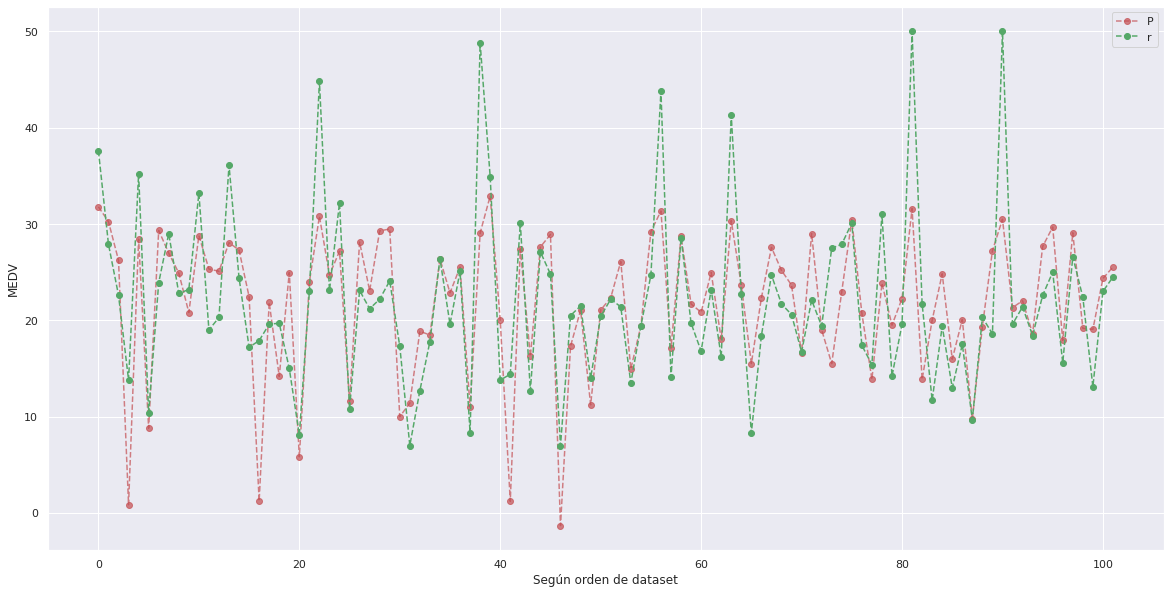

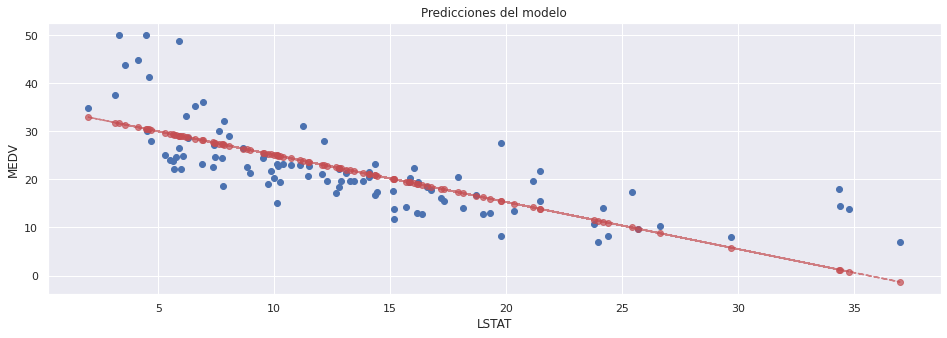

In [33]:
from sklearn.linear_model import ARDRegression

print("Probando Modelo ARDR")
probar_modelo(ARDRegression(),X_train,y_train, X_test, y_test)

Probando Modelo Lasso
Rendimiento del conjunto de entrenamiento
RMSE : 5.836962383204569
R2   : 0.6033823448412788
Rendimiento del conjunto de entrenamiento
RMSE : 5.651689906704968
R2   : 0.5920293717740585


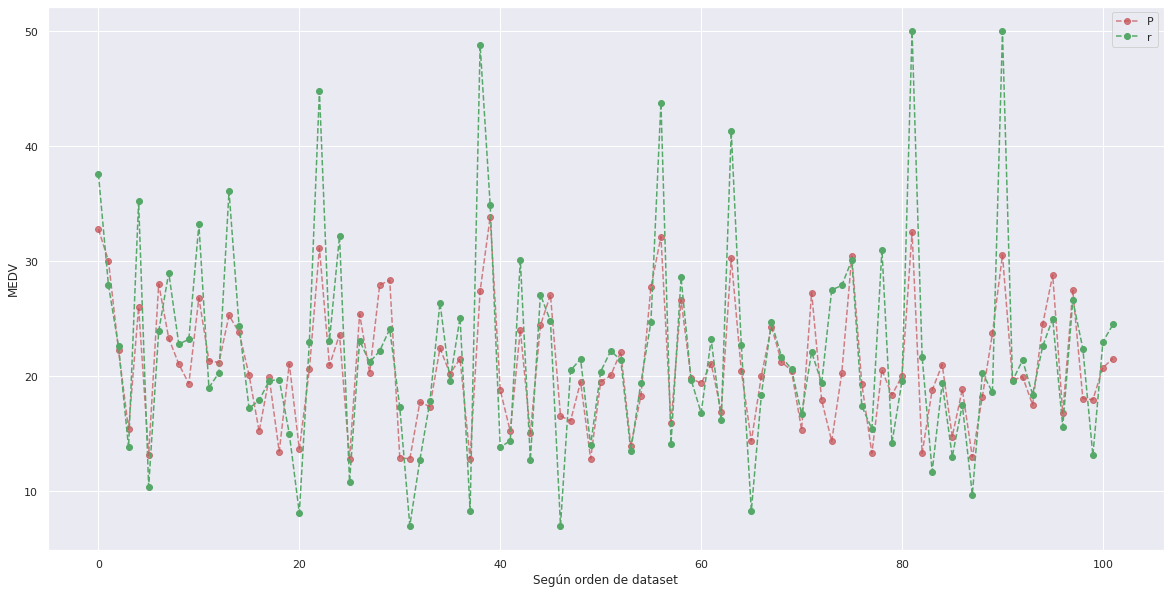

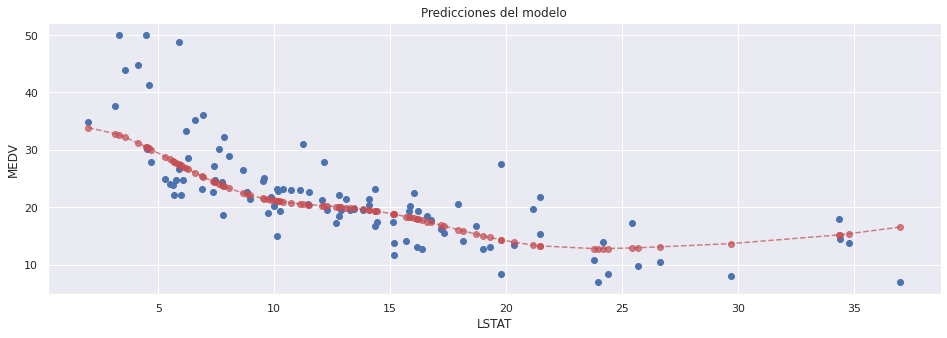

In [36]:
from sklearn.svm import SVR

print("Probando Modelo Lasso")
probar_modelo(SVR(),X_train,y_train, X_test, y_test)

Probando Modelo Lasso
Rendimiento del conjunto de entrenamiento
RMSE : 1.497875282871142
R2   : 0.9738814199649357
Rendimiento del conjunto de entrenamiento
RMSE : 8.349677110112538
R2   : 0.10954575374982478


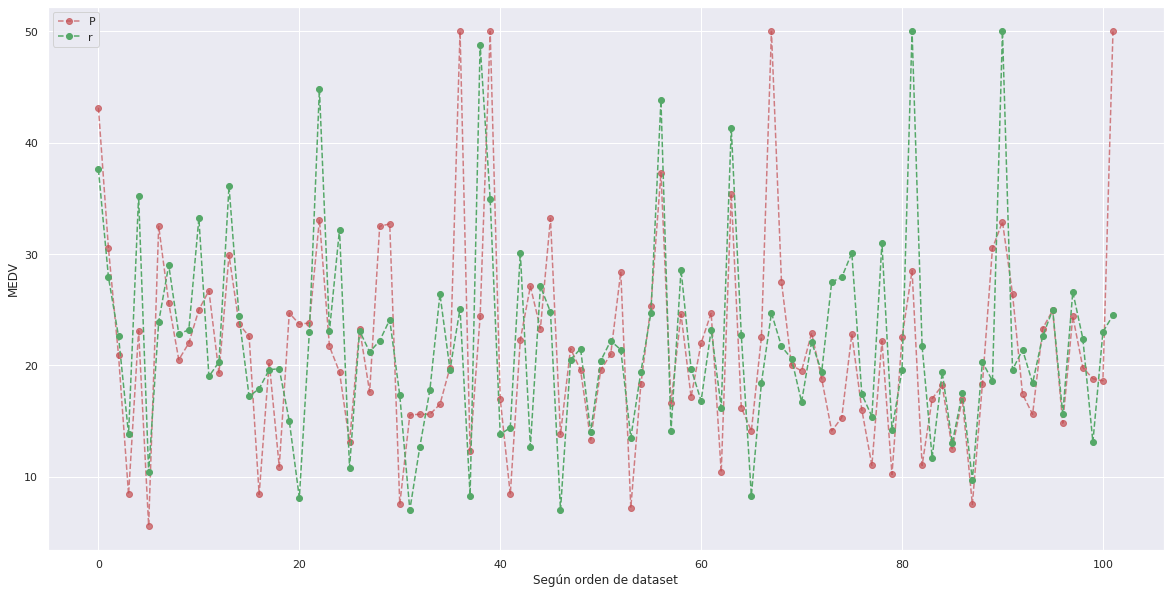

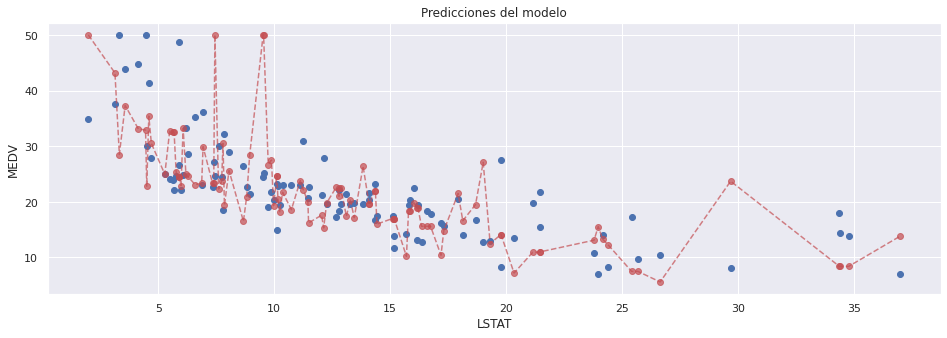

In [37]:
from sklearn.tree import DecisionTreeRegressor

print("Probando Modelo Lasso")
probar_modelo(DecisionTreeRegressor(),X_train,y_train, X_test, y_test)

Probando Modelo KNN
Rendimiento del conjunto de entrenamiento
RMSE : 4.626143744047958
R2   : 0.7508639928326483
Rendimiento del conjunto de entrenamiento
RMSE : 5.62471994945561
R2   : 0.5959137665137708


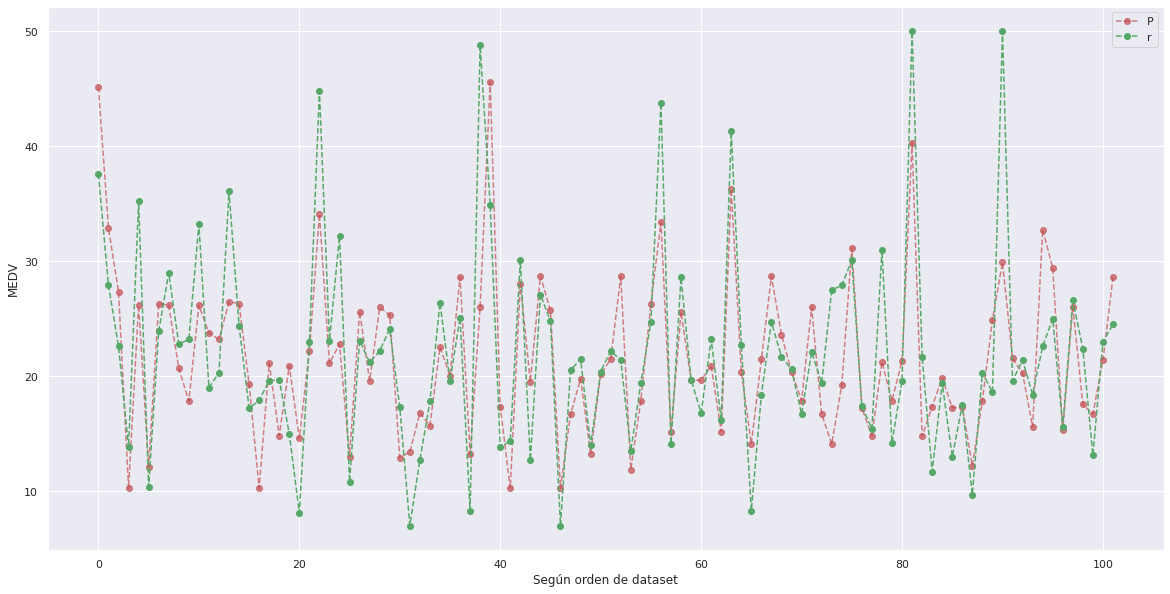

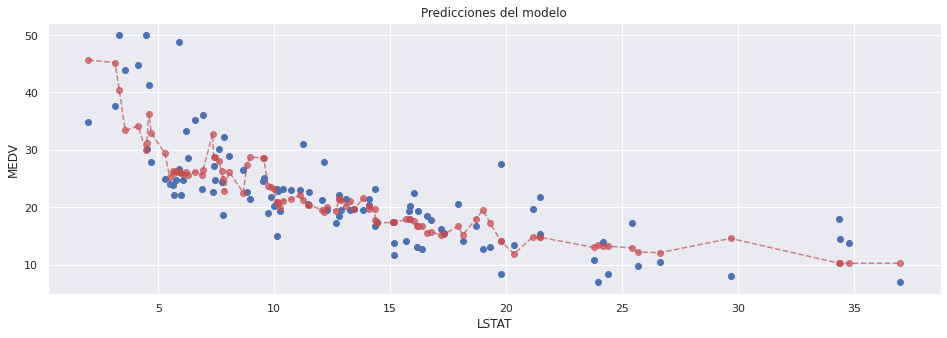

In [38]:
from sklearn.neighbors import KNeighborsRegressor

print("Probando Modelo KNN")
probar_modelo(KNeighborsRegressor(),X_train,y_train, X_test, y_test)

Probando Modelo NB
Rendimiento del conjunto de entrenamiento
RMSE : 3.6630059359431804
R2   : 0.8438027085974509
Rendimiento del conjunto de entrenamiento
RMSE : 6.235414162481928
R2   : 0.503404411851183


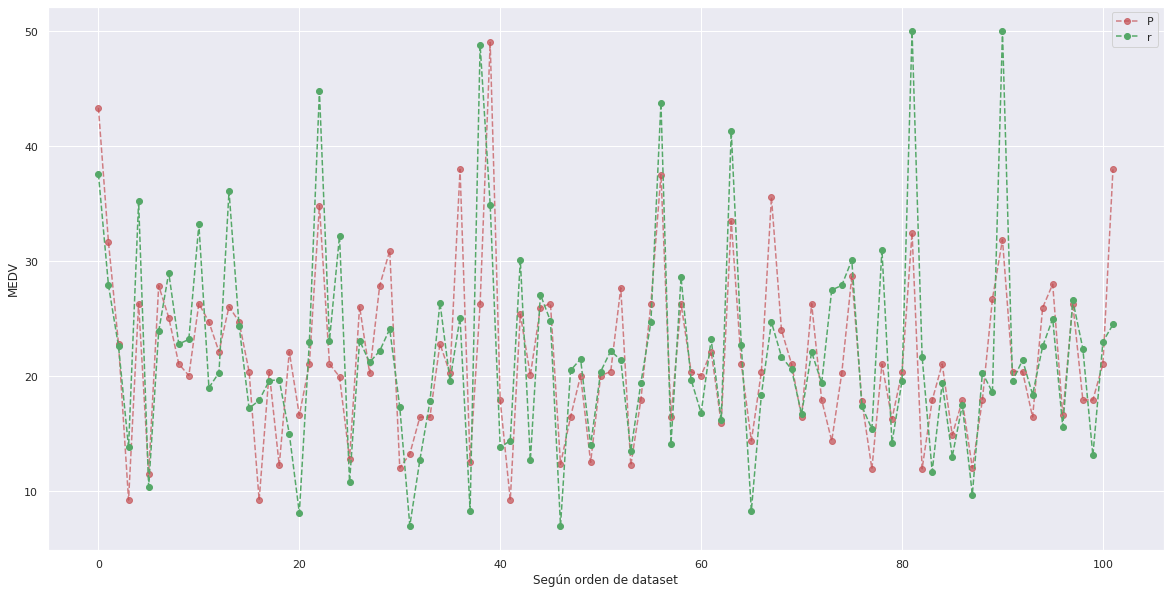

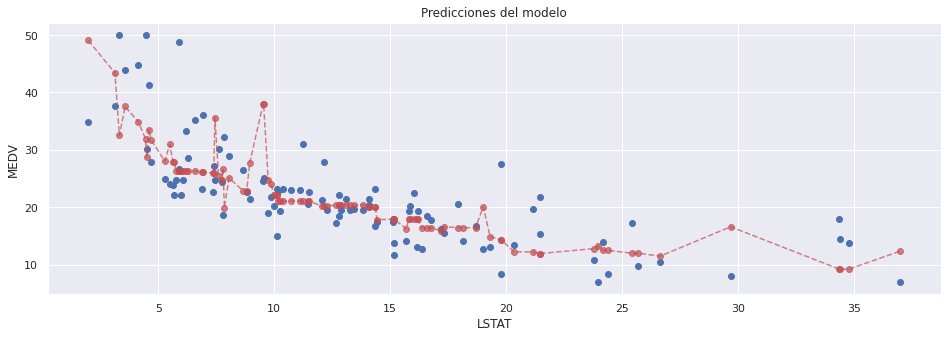

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

print("Probando Modelo NB")
probar_modelo(GradientBoostingRegressor(),X_train,y_train, X_test, y_test)

Probando Modelo ADA
Rendimiento del conjunto de entrenamiento
RMSE : 5.402560079241253
R2   : 0.6602202722798958
Rendimiento del conjunto de entrenamiento
RMSE : 5.525230201303087
R2   : 0.6100822544269325


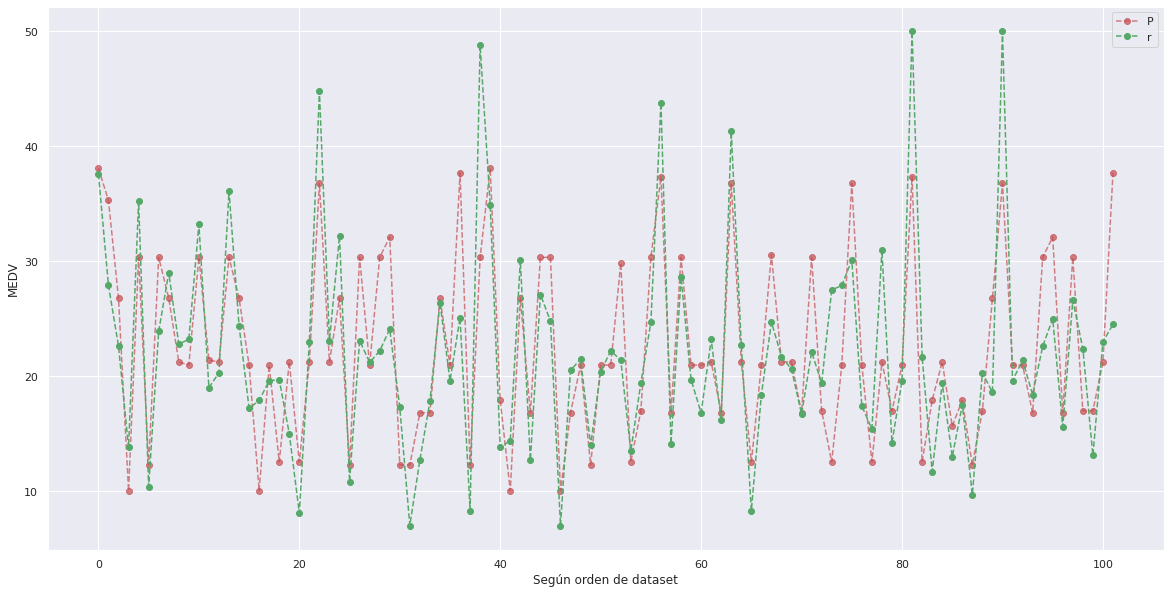

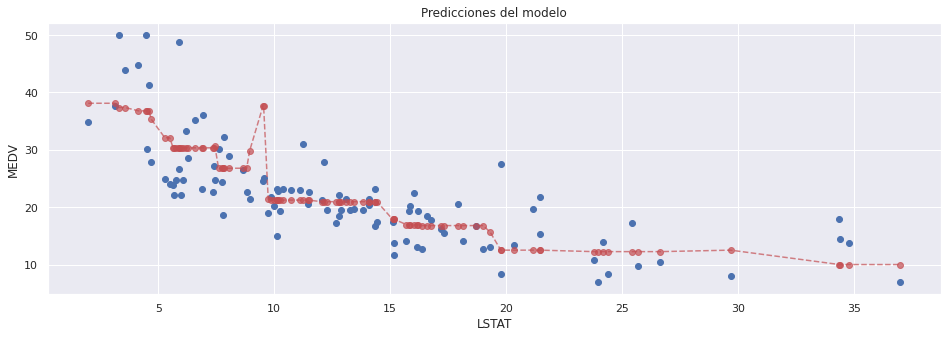

In [42]:
from sklearn.ensemble import AdaBoostRegressor

print("Probando Modelo ADA")
probar_modelo(AdaBoostRegressor(),X_train,y_train, X_test, y_test)

In [46]:
# Validación cruzada
from sklearn.model_selection import cross_val_score

modelos = {}
modelos['LR_'] = LinearRegression()
modelos['Las'] = Lasso()
modelos['SVM'] = SVR()
modelos['DTR'] = DecisionTreeRegressor()
modelos['KNN'] = KNeighborsRegressor()
modelos['GDR'] = GradientBoostingRegressor()
modelos['ADA'] = AdaBoostRegressor()

resultados_modelos = []
print("Modelos\t\t Mean \t\t STD")
print("______________________________________")

for modelo_a_probar in modelos:
  resultados = cross_val_score(modelos[modelo_a_probar], X_train, y_train, scoring = 'neg_mean_squared_error')
  resultados_modelos.append(resultados)

  print("{}\t\t: {}\t {}".format(modelo_a_probar, round(resultados.mean(),3), round(resultados.std(),3)))

Modelos		 Mean 		 STD
______________________________________
LR_		: -39.364	 7.22
Las		: -39.353	 7.171
SVM		: -35.785	 8.585
DTR		: -52.889	 7.305
KNN		: -32.321	 5.887
GDR		: -34.185	 6.459
ADA		: -34.128	 3.781


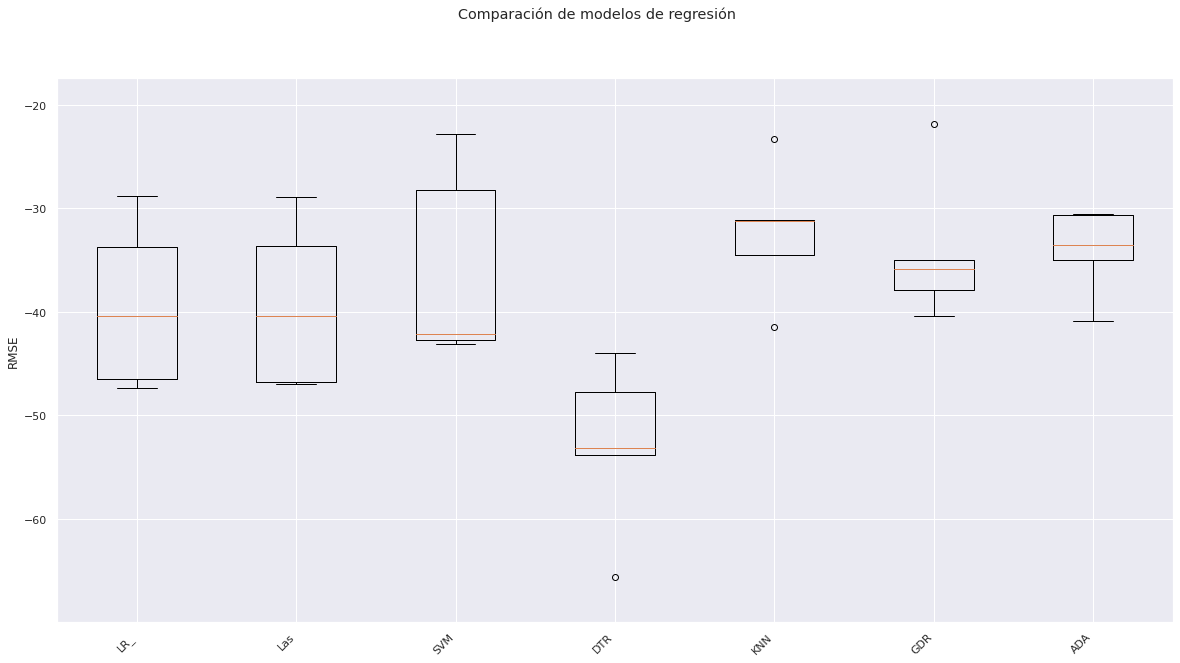

In [50]:
#Gráfica de comparación de Modelos

figura = plt.figure()
figura.suptitle('Comparación de modelos de regresión')
ejes = figura.add_subplot(111)

plt.boxplot(resultados_modelos)
ejes.set_xticklabels(modelos, rotation = 45, ha = "right")
ejes.set_ylabel("RMSE")
plt.margins(0.05, 0.1)
plt.show()